# Forecast the Car Insurance Risk Rating 
by Anca Pitigoi


### Introduction

In this project the automobile insurance risk dataset will be used to explore how machine learning models can be used to drive insights that can ultimately be used by the insurance company to make data-driven decisions. In the beginning of the project data exploration, validation, and cleaning will be performed. By comparing the performance of different models in Python, the aim is to predict the risk rating based on the car's various characteristics. The models that will be used to answer the question are Decision Trees, Random Forests, and Support Vector Machine (SVM). The reason for choosing this dataset is because of the practical value it brings to real-world problems. This analysis can provide valuable insights for insurance companies and actuaries, helping them better assess risk and tailor premiums more accurately based on car features.

### Dataset import

Import the dataset directly from OpenML using the function created by me, and all other necessary modules.

In [7]:
# Import required modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import Import_function as mine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [8]:
df = mine.import_openml(45080) # Only specifies the ID listed on OpenML
print(df.head())  # Display the first few rows of the data frame

   normalized-losses  wheel-base      length      width     height  \
0          98.983809  109.671854  176.850764  68.332583  53.761371   
1         100.438281  106.124379  196.911227  64.238727  56.693794   
2          95.331424  113.045858  197.020848  69.558786  55.628533   
3          94.484845  104.751734  191.156065  67.986143  52.312385   
4          96.361076   97.405820  159.761982  66.584921  52.666162   

   curb-weight  engine-size      bore    stroke  compression-ratio  ...  \
0  2405.291335   111.915541  3.633200  3.138143          15.922893  ...   
1  3035.923440   171.373292  3.525168  3.868090          18.282337  ...   
2  2775.911662   119.144969  3.655105  2.622878          15.158004  ...   
3  3519.387948   142.158669  2.994016  3.110053           9.339323  ...   
4  3206.987727   119.193585  2.997573  3.310819           9.000000  ...   

   fuel-type  aspiration  num-of-doors  body-style  drive-wheels  \
0        gas         std           two       wagon          

Based on the previous print, the data set has correctly imported. To further validate that this is a pandas Data Frame, the isinstance() will be used.

In [9]:
print(isinstance(df, pd.DataFrame))

df.shape

True


(1000000, 26)

The auto data frame is indeed a pandas data frame, and contains 1 million observations and 26 variables.

Because there are too many observations contained in the dataset, in order to save computational power while performing different models, a selection of 10,000 random observations will be achieved.

In [10]:
s_auto = df.sample(10000, random_state = 53) # random_state = 53 ensures reproducibility
print(s_auto.tail()[s_auto.columns[:4]])
print(s_auto.shape)

# Risk rating should be an ordinal categorical variable, it will be better suited for classification and regression analysis
s_auto['class'] = pd.Categorical(s_auto['class'], categories = [-3, -2, -1, 0, 1, 2, 3], ordered = True)


        normalized-losses  wheel-base      length      width
306178         113.920108  103.184526  170.520392  66.622382
996534         103.525002   93.293993  154.295096  63.164404
970489         150.819549  108.112400  194.142570  64.852260
883730          87.634126   94.983691  172.874567  65.902244
928851          66.816506  115.432978  187.230439  70.626181
(10000, 26)


## Exploratory Data Analysis
In this phase of the project data cleaning and validation will be performed to ensure an accurate conclusion. The following actions will be taken: correcting errors, handling outliers, and resolving inconsistencies, while ensuring that the data is properly formatted for analysis. Moreover, visualizations will help draw insights from the data.

In [11]:
# Rename the columns
s_auto.columns = s_auto.columns.str.replace("[-]", "_", regex = True)

s_auto.info() # no missing obs., data types are correct

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 648107 to 928851
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   normalized_losses  10000 non-null  float64 
 1   wheel_base         10000 non-null  float64 
 2   length             10000 non-null  float64 
 3   width              10000 non-null  float64 
 4   height             10000 non-null  float64 
 5   curb_weight        10000 non-null  float64 
 6   engine_size        10000 non-null  float64 
 7   bore               10000 non-null  float64 
 8   stroke             10000 non-null  float64 
 9   compression_ratio  10000 non-null  float64 
 10  horsepower         10000 non-null  float64 
 11  peak_rpm           10000 non-null  float64 
 12  city_mpg           10000 non-null  float64 
 13  highway_mpg        10000 non-null  float64 
 14  price              10000 non-null  float64 
 15  make               10000 non-null  category
 16  fue

In [12]:
# Duplicates
print(s_auto.duplicated().sum()) # there are no duplicate entries

# Erroneous and inconsistent data

# Checking the categorical variables:
s_auto.value_counts('make')
# Alfa Romero is a wrong name for the car brand - correct name is Alfa Romeo
s_auto['make'] = s_auto['make'].cat.rename_categories({'alfa-romero': 'alfa-romeo'})

s_auto.value_counts('fuel_type') # only 2 options, which was correct at that time
s_auto.value_counts('aspiration') 
s_auto.value_counts('num_of_doors')
s_auto.value_counts('body_style') # 5 options are correct
s_auto.value_counts('drive_wheels') # fwd, rwd, and 4wd, which is correct
s_auto.value_counts('engine_location') # two options, front and back
s_auto.value_counts('engine_type') # all the mechanical variations in engine design and performance are accurate
s_auto.value_counts('num_of_cylinders') # no misspelled names, 7 distinc type of engines
s_auto.value_counts('fuel_system') # all fuel systems are correct.  MFI is an older system used before electronic fuel injection became standard. 
    # It could also be confused with MPFI, but since dataset contains old car models, this is accurate.
s_auto.value_counts('class') # All the classes specified in the dataset description are accurate.


0


class
 0    3205
 1    2604
 2    1539
 3    1368
-1    1074
-2     189
-3      21
Name: count, dtype: int64

Based on the results, there are no missing values in the data frame, and there are a variety of data types. The data types are correctly imported.
Data validation was performed on all of the categorical columns to understand if the specifications are valid. It was notice that Alfa Romeo was misspelled, and the name of the car brand was corrected.

In [13]:
# Checking the numerical variables:
# Outliers 
s_auto.describe()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,114.448812,98.799371,173.822123,65.852810,53.768578,2533.270416,122.745231,3.321099,3.242215,9.926510,103.352132,5129.582254,24.643474,29.959039,12859.465668
std,35.345885,6.105961,11.910492,2.128090,2.455889,509.862949,38.844355,0.267367,0.321860,3.782459,39.140744,542.599572,6.384253,6.381183,7592.387339
min,52.406293,84.486161,137.360349,61.341467,47.840359,1580.430448,30.752142,2.661351,1.880794,-8.527946,46.395317,3773.789785,12.523917,13.491291,-2133.178783
25%,86.309596,94.955810,167.308894,64.261247,52.032149,2164.329937,98.205096,3.120566,3.116067,8.517459,73.519120,4794.961863,19.494498,25.486282,7890.509959
50%,103.687587,96.999093,173.106005,65.544407,53.907224,2425.316396,112.197164,3.320640,3.275718,9.000000,94.265250,5087.395360,24.100079,29.801075,10239.519697
75%,139.405563,101.550095,181.170459,66.837162,55.383607,2871.922749,133.436734,3.541459,3.416041,9.348299,118.238800,5479.629399,28.331343,33.295016,15216.786632
max,260.508145,123.640175,211.620165,73.833830,61.219389,4324.569890,336.166905,3.989613,4.288732,34.388673,287.971510,6640.694727,49.586544,55.456993,50533.232829


Normalized losses, curb_weight, and engine_size might potentially have too small and large values.
Compression ratio has minimum values as negative, this needs to be checked. 
City miles per gallon and highway miles per gallon seem consistent with each other. 
Price might have outliers.

A better way to check for outliers is to create a large visualization that includes all numerical variables in a box plot as seen below.

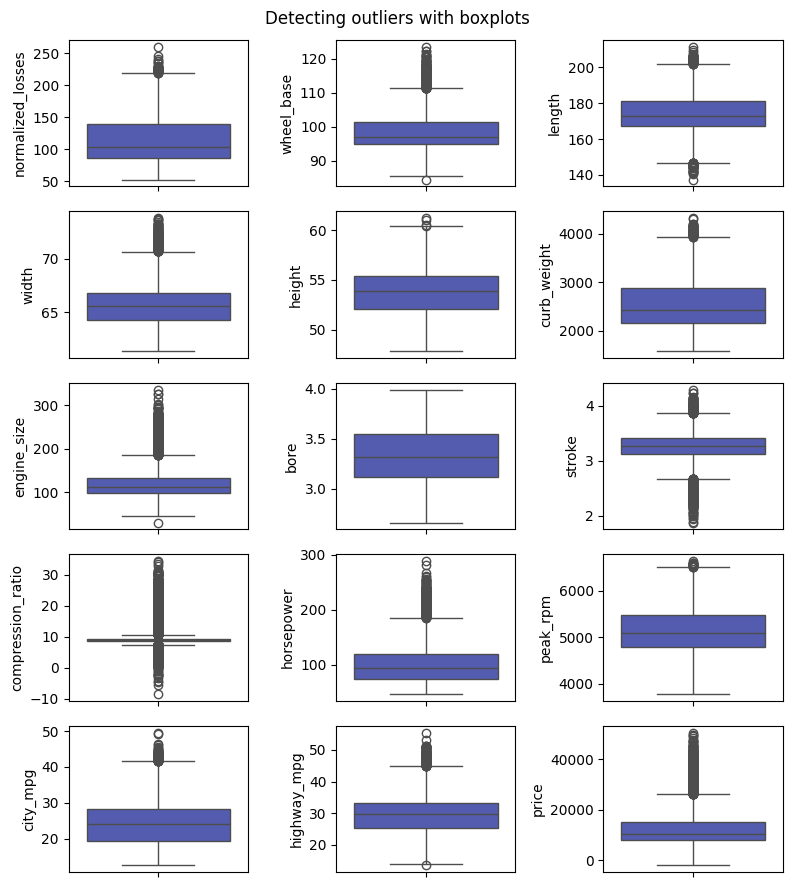

In [14]:
# Boxplot visualization for each numerical value
# Select only numeric columns
numeric_vars = s_auto.select_dtypes(include = ['number'])

# Create boxplots for each numeric variable
fig, axes = plt.subplots(nrows = (len(numeric_vars.columns) + 2) // 3, ncols = 3, figsize = (8, 9))
axes = axes.flatten()

for i, var in enumerate(numeric_vars.columns):
    sns.boxplot(data = s_auto, y = var, ax = axes[i], color = '#4450BE')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(var)

plt.suptitle('Detecting outliers with boxplots')
plt.tight_layout()
plt.show()

Several variables have clear outliers, as shown by the points outside the whiskers of the boxplot:

•	Normalized losses: Multiple high outliers.

•	Engine size: Significant number of high outliers.

•	Compression ratio: Extreme high values that might need attention.

•	Horsepower: A few high values that are outliers.

•	Price: Numerous extreme high values, suggesting potential outliers or luxury cars that differ from the bulk of the data.

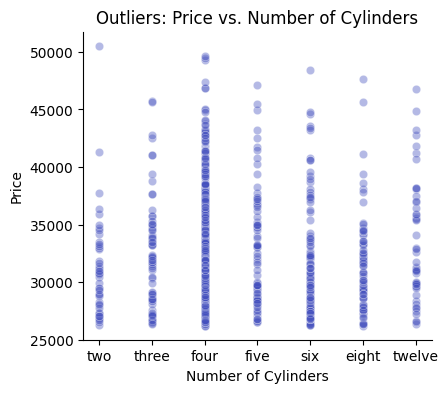

In [15]:
# Checking the price outliers with the function we created

outliers_price = mine.get_outliers(s_auto, 'price')

# Convert the 'num_of_cylinders' column to a categorical type with the specified order for better representation
outliers_price['num_of_cylinders'] = pd.Categorical(outliers_price['num_of_cylinders'], categories=['two', 'three', 'four', 'five', 'six', 'eight', 'twelve'], ordered=True)

plt.figure(figsize=(4.5, 4))

# Create a scatter plot or box plot with price on the y-axis and num_of_cylinders on the x-axis
sns.scatterplot(data = outliers_price, x = 'num_of_cylinders', y = 'price', color = '#4450BE', alpha = 0.4)

# Set labels and title
plt.xlabel('Number of Cylinders')
plt.ylabel('Price')
plt.title('Outliers: Price vs. Number of Cylinders')

# Removes the box-like feature
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.show()

At the first glance it seems like there are outliers, especially in the case of two, three, five, eight, and twelve cylinders cars. Three-cylinder and two-cylinder vehicles are generally rare and are often lower-cost, more fuel-efficient cars, so having a vehicle with such few cylinders priced at 35,000 or higher could be a significant outlier. Twelve-cylinder vehicles typically fall under the luxury or high-performance categories, so outliers in this category could reflect extremely high-end models, but they are expected to be in the high price range.

However, we observe a similar pattern for cars with each number of cylinders: prices start lower and increase. It's possible that the less expensive cars were made earlier, such as in 1990, while the more expensive ones were manufactured later, like in 1997. Though these data points are statistical outliers, they likely reflect historical pricing trends rather than errors.

In [16]:
# Checking the compression ratio outliers
outliers_compr = mine.get_outliers(s_auto, 'compression_ratio') # almost 2000 of observations
print(outliers_compr[outliers_compr['compression_ratio'] < 1]['compression_ratio'].count()) #there are 31 observations (0.31% from the total obs.)

31


In [17]:
# Keep only valid observations
s_auto = s_auto[s_auto['compression_ratio'] >= 1]

Since both the maximum and minimum cylinder volumes are positive values, the resulting compression ratio is always a positive number. Because there are only 31 observations that are less than 1, they can be safely removed from the analysis.

Moving on, in order to have a glimpse of the relationship between the variables, the correlation matrix will be created.

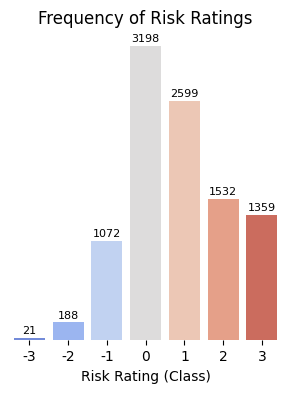

In [18]:
# Is the dataset balanced in terms of the target variable class?
class_count = s_auto.value_counts('class').sort_index()

# Create a bar plot
plt.figure(figsize=(3.5, 4))
sns.barplot(x = class_count.index, y = class_count.values, hue = class_count.index, palette = 'coolwarm', legend = False)

# Add titles and labels
plt.title('Frequency of Risk Ratings')
plt.xlabel('Risk Rating (Class)')

# Removes the box-like feature
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().set_yticks([]) # removes y-axis ticks and labels

# Add the store count labels on each bar
for i, value in enumerate(class_count.values):
    plt.text(i, value + 50, str(value), ha='center', fontsize=8)

# Show the plot
plt.show()

The bar graph shows the frequency of risk ratings (class) for the dataset, with values ranging from -3 (safe) to 3 (risky). The insights resulted from the graph are:

•	The distribution is negatively skewed toward the neutral-to-risky side, with fewer safe vehicles.

•	Most cars in the dataset are rated as neutral or slightly risky (Class 0).

•	Very safe cars are extremely rare, and there are very few cars classified as extremely risky (Class 3).

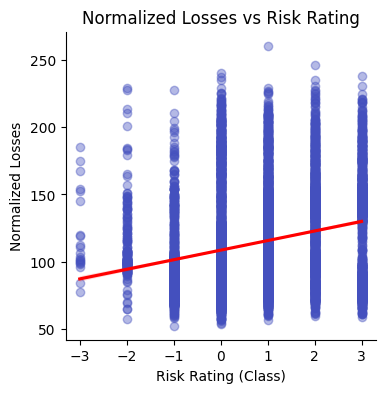

In [19]:
# Is the normalized losses variable correlated with the risk rating?
plt.figure(figsize=(4, 4))

sns.regplot(data = s_auto, x = 'class', y = 'normalized_losses', color = '#4450BE', scatter_kws = {'alpha':0.4}, line_kws = {'color':'red'})

# Add titles and labels
plt.title('Normalized Losses vs Risk Rating')
plt.xlabel('Risk Rating (Class)')
plt.ylabel('Normalized Losses')

# Removes the box-like feature
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.show()

The regression line suggests that vehicles with higher risk ratings (more risky) tend to have somewhat higher normalized losses. However, the relationship is not very strong, as there is significant variability in normalized losses within each risk rating category, indicating that other factors might be more influential in determining the risk rating. Since normalized losses doesn’t have a strong relationship with the risk rating, it won't strongly influence or bias the model if included in the analysis.

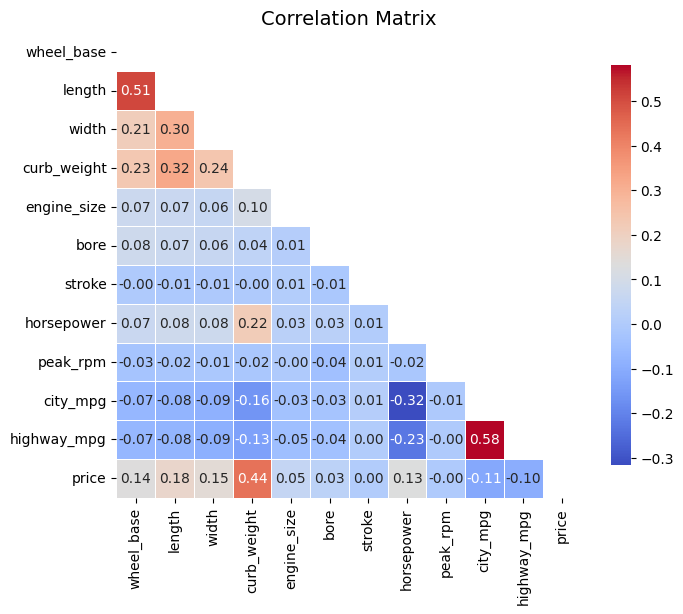

In [20]:
columns_to_remove = numeric_vars.columns[[0, 4, 9]]

# Drop the columns from the DataFrame by name
numeric_vars_update = numeric_vars.drop(columns=columns_to_remove)

corr_matrix = numeric_vars_update.corr() # Calculate the correlation matrix for the numeric variables

plt.figure(figsize=(7.5, 6.5)) # Set up the matplotlib figure

# Draw the heatmap with customizations
sns.heatmap(corr_matrix, 
            mask=np.triu(np.ones_like(corr_matrix, dtype=bool)), # Mask upper triangle
            cmap='coolwarm', 
            annot=True,  # Add correlation coefficients
            fmt = ".2f",   # Format numbers to 2 decimal places
            linewidths=.5,  # Add grid lines between cells
            cbar_kws={"shrink": .8},  # Color bar size
            square=True,  # Square-shaped cells
            annot_kws={"size": 10},  # Customize annotation font size
            )

# Customize plot labels and appearance
plt.title("Correlation Matrix", fontsize = 14)
plt.xticks(rotation = 90, fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

The correlation matrix was attempted multiple times in order find the most useful features to represent. For instance normalized_losses showed almost no correlation with other variables, with values around 0.01 to 0.03. This feature is unlikely to contribute significantly to relationships with other variables, so it was removed. Moreover, compression ratio had extremely low correlations with all other features, making it a candidate for removal. Lastly, length, width, and curb weight have some correlations with each other, indicating potential multicollinearity. Therefore the width feature will be removed as well from the analysis.

•	The following information can be drawn from the correlation matrix:

•	There is a strong correlation between city miles per gallon (MPG) and highway MPG (0.59), which is expected since fuel efficiency in city and highway driving are closely related.

•	There is a moderate correlation between length and curb weight (0.34), indicating that longer cars also tend to be heavier.

•	There is a moderate negative correlation between horsepower and city MPG (-0.31), suggesting that vehicles with higher horsepower tend to have lower fuel efficiency in the city.

All in all, there are no high correlation within the numerical variables. Moreover, multicolinearity might be present when regression analysis will be conducted. Both length and width present some correlation with curb weight. Including all three of these variables in a model could result in multicollinearity because they are all related to the vehicle's overall size and weight.

## Comparing classification models

### Support Vector Machines (SVM)

In [21]:
# Prepare the dataset

# SVM predicts numerical variables, so the targeted variable is transformed back to numerical
s_auto['class'] = s_auto['class'].astype(int)

# Split categorical and numerical variables since SVM takes only numerical features

categ_vars = s_auto.select_dtypes(include=['category'])
numeric_vars = s_auto.select_dtypes(include=['number'])

# Transform to dummy variables the categorical variables
dummies = pd.get_dummies(categ_vars)

# Concatenate the numerical columns back with the one-hot encoded columns
encoded_auto = pd.concat([numeric_vars, dummies], axis=1)

# Separate features and target variable
X = encoded_auto.drop(columns=['class', 'highway_mpg', 'width'])  # class, width, highway_mpg (this will cause multicolinearity with city_mpg) will be removed. 
y = encoded_auto['class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 73)

# Scale numerical variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In the prepartion for the Support Vector Machine (SVM) method, these steps were firstly taken to be able to use the technique: 

•	Encode the categorical variables.

•	Scale the numerical variables, because SVMs are sensitive to feature scaling.

•	Split the dataset into features (X) and the target variable (y), and then split it into training and testing sets.

In [22]:
# Train the Support Vector Classifier
svm_model = SVC(kernel='linear') 
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

In [23]:
# Evaluate the results

# How accurate is the classifier?
print("Accuracy:", round(metrics.accuracy_score(y_test, y_pred), 4))

Accuracy: 0.6249


The SVM model, which included both encoded categorical and numerical variables, achieved an accuracy of 62.49%. This indicates that the model correctly classified around 63% of the risk ratings in the dataset. While the performance is reasonable, it suggests that the model may have room for improvement, potentially by refining feature selection, tuning hyperparameters, or exploring other models better suited for this classification task.

Next, the model will be tried with the kernel radial basis function (RBF), because it is useful for non-linear hyperplane.

In [24]:
# Train the Support Vector Classifier
svm_model2 = SVC(kernel='rbf') 
svm_model2.fit(X_train, y_train)

# Make predictions
y_pred2 = svm_model2.predict(X_test)

# Evaluate the results

# How accurate is the classifier?
print("Accuracy:", round(metrics.accuracy_score(y_test, y_pred2), 4))

Accuracy: 0.6596


We can see that the model improved by about 3.5%. Next, the Principal Component Analysis will be performed to understand if the model can be further improved by selecting only the most important features.

In [25]:
pca = PCA(n_components = 15)  # Reduces to only 15 components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test) # Apply the same transformation to the test set

In [26]:
svm_model3 = SVC(kernel='rbf')
svm_model3.fit(X_train_pca, y_train)

# Make predictions using the transformed test set
y_pred3 = svm_model3.predict(X_test_pca)

# Evaluate the results

# How accurate is the classifier?
print("Accuracy:", round(metrics.accuracy_score(y_test, y_pred3), 4))

Accuracy: 0.6359


The accuracy level worsened when the PCA was applied, dropping the accuracy level to 63.59%. While in this analysis the best accuracy results were achieved with SVM with RBF kernel (65.96%), further improvements could be made. Further tuning of hyperparameters (such as C and gamma for the RBF kernel) using techniques like GridSearchCV could improve performance. Fine-tuning the model could lead to even higher accuracy. Moreover, because there is an imbalance in the risk rating, class weighting can be considered.

In [27]:
# Train SVM with automatic class weighting
svm_model4 = SVC(kernel='rbf', class_weight='balanced')  # Automatically adjust weights based on class frequency
svm_model4.fit(X_train, y_train)

# Make predictions
y_pred4 = svm_model4.predict(X_test)

# Evaluate the results
print("Accuracy:", round(metrics.accuracy_score(y_test, y_pred4), 4))

Accuracy: 0.6366


As a summary, these are the accuracies for each SVM model:

•	Linear SVM: 62.49%

•	RBF SVM: 65.96%

•	RBF SVM with PCA: 63.59%

•	RBF SVM with class weight balanced: 63.66%

The best performing SVM model is the one that consideres all the dataset and kernel RBF. This model can predict the risk rating with about 66% accuracy.

## Decision Tree

In [28]:
# The categorical variables were already encoded in the previous model. 
# Scaling the variables is optional for the Decision Tree model, but they are already scaled becasue the SVM was sensitive to them.

tree_model = DecisionTreeClassifier(class_weight = 'balanced', random_state = 53) # The dataset is slightly imbalanced, so class_weight will fix that issue.
tree_model.fit(X_train, y_train)

# There are many variables in the dataset because of the encoded categorical variables, so the decision tree must be tuned before a visualization of the tree is performed.

y_pred_tree = tree_model.predict(X_test) # Makes predictions

# Evaluate the model
accuracy = tree_model.score(X_test, y_test) # shows the accuracy score
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.5209


The accuracy of the Decision Tree model is only 52.09%, less than any of the SVM methods. Tuning the tree might help get better results.

In [29]:
# Tuning the tree
param_grid = {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10]}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator = tree_model, param_grid=param_grid, cv=5, verbose=1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_tree = grid_search.best_estimator_

# Make predictions on the test set
y_pred_tree2 = best_tree.predict(X_test)

# Calculate accuracy and display classification report
accuracy = accuracy_score(y_test, y_pred_tree2)
print(f"Accuracy: {accuracy:.4f}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Accuracy: 0.4931


The hyperparameter tuning involved the data being split into 5 subsets, called folds. In cross-validation, the model is traing on some of the fold and tested on the remaining folds. There are 12 candidates that represent different configurations that the algorithm assesses. In the end, the model is being trained and validated 60 times.

The tuned Decision Tree worsened than the previous one model, which might mean that overfitting of the data occurred.

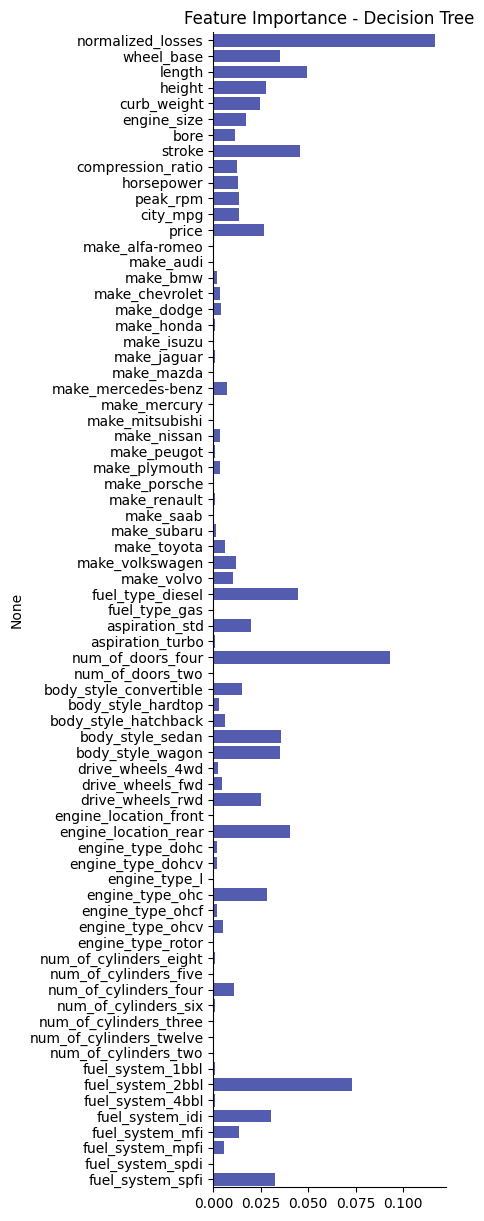

In [30]:
mine.plot_feature_importances(best_tree, '#4450BE', 'Feature Importance - Decision Tree', X.columns) #using the function we made since there are multiple graphs like this

This feature importance plot shows how much each feature contributes to the decisions made by the tuned decision tree model. The higher the value, the more influential the feature is in determining the risk rating. The model relies heavily on normalized lossess, vehicle dimensions and performance-related features like fuel system, stroke, and fuel type to predict risk, with some categories having little to no effect.

In [31]:
# plt.figure(figsize=(20,10))
# tree.plot_tree(best_tree, filled=True, feature_names=encoded_auto.columns, class_names=True, rounded=True)
# plt.show() 

The print of the decision tree figure takes too much to create and there are too many branches since the tree was not trimmed in the tuning process. The computational power is not worth, since the tree is very difficult to interpret.

## Random Forest

In [32]:
# The categorical variables were already encoded in the previous models. 
# Scaling the variables is optional for the Random Forest model, but they are already scaled becasue the SVM was sensitive to them.

forest_model = RandomForestClassifier(n_estimators=100, random_state = 53)  # n_estimators is the number of trees
forest_model.fit(X_train, y_train)

y_pred_forest = forest_model.predict(X_test)

# Evaluate the model
accuracy = forest_model.score(X_test, y_test) # shows the accuracy score
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.6777


The Random Forest model is built similarly to the Decision Tree, involving the encoding of categorical variables, scaling of features, splitting the dataset, and fitting the model. However, unlike a single decision tree, the Random Forest aggregates the results from multiple trees to improve accuracy and reduce overfitting. The Random Forest model achieved an accuracy of 67.77%, much higher than the decision tree's performance. As a matter of fact, it achieved a slightly better accuracy rate than the SVM (65.96%)

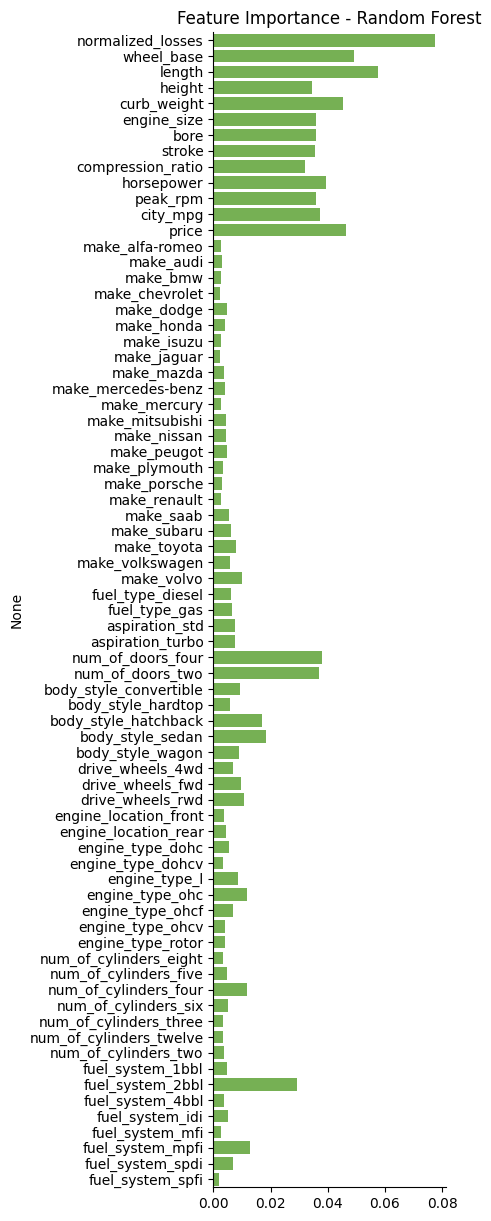

In [33]:
mine.plot_feature_importances(forest_model, '#72BF45', 'Feature Importance - Random Forest', X.columns)

Overall, the random forest heavily relies on vehicle dimensions and performance metrics for its predictions, as the Decision Tree model.

## Conclusion

In this analysis, the auto dataset was used to answer the question whether the risk rating can be predicted based on various car features. Firstly the dataset was cleaned and validated for potential erroneous data. Afterwards exploratory analysis was performed in order to prepare for the data mining methods. Lastly, various machine learning techniques were implemented to classify the risk rating of vehicles using the vehicle dataset. The key methods employed included Decision Trees, Random Forests, and Support Vector Machines (SVMs). Some models were tuned using GridSearchCV to optimize the performance by selecting the best hyperparameters.

The SVM with RBF kernel achieved the best accuracy of 67.68%, demonstrating that non-linear relationships between features and risk ratings are important. The Random Forest model, which aggregates the predictions of multiple decision trees, achieved a close accuracy of 67.78%. Despite this, further hyperparameter tuning and cross-validation could still enhance its performance. Moreover, based on the analysis, the categorical features have shown little importance in the feature importance plots and haven't significantly contributed to improving the accuracy of the models, it could be worth considering their removal to simplify the model, and potentially improve generalization by reducing noise.

In conclusion, the application of Decision Trees, Random Forests, and SVM provided valuable insights into the classification of risk ratings in this dataset. Each model contributed uniquely to the analysis: Decision Trees offered simplicity and interpretability, Random Forests enhanced accuracy by reducing overfitting through ensemble learning, and SVM captured complex, non-linear relationships. Together, these models allowed for a comprehensive exploration of the data, guiding us toward better understanding the underlying patterns and providing actionable recommendations for improving prediction accuracy.
